# Linear Regression with Scikit Learn
 ## NAME - Likhit N
 
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

TASK: In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt

Read the data and Explore data

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


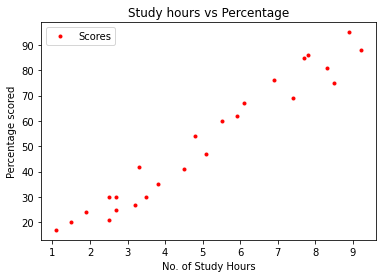

In [4]:
data.plot(x = 'Hours', y = 'Scores', style = '.', color = 'r')
mplt.title ('Study hours vs Percentage')
mplt.xlabel ('No. of Study Hours')
mplt.ylabel ('Percentage scored')
mplt.show()

## Training a Linear Regression Model
Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Scores column.

## X and Y arrays

In [45]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

## Train Test Split: 
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [46]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression(normalize = True)  
regressor.fit(X_train, y_train)

#print('Model Trained')

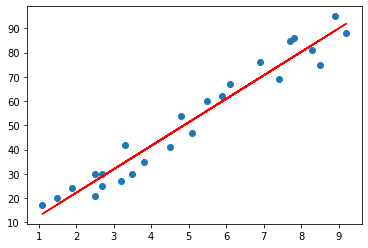

In [48]:

line = regressor.coef_*X+regressor.intercept_


mplt.scatter(X, y)
mplt.plot(X, line, color = 'r');
mplt.show()

## Predictions from our Model
Let's grab predictions off our test set and see how well it did!

In [49]:
y_predict = regressor.predict(X_test)

In [50]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})  
df

We can use our own values to predict the scores as well, in this case we are predicting the percentage of an student for 9.25 hours/day

In [51]:
test_hours = [[9.25]]
predict = regressor.predict(test_hours)
print("No. of Hours = {}".format(test_hours))
print("Predicted Score = {}".format(predict[0]))

## Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [44]:
from sklearn import metrics 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_predict)) 
print('Mean squared  Error:', mean_squared_error(y_test, regressor.predict(X_test)) )
print('r^2 score error:', r2_score(y_test, regressor.predict(X_test)) )

Here are three common evaluation metrics for regression problems:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.